In [1]:
#Librairy 
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix, fowlkes_mallows_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mode 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 



# 1. k-means on digits

Use K-means clustering on the MNIST dataset (which can be imported with `from sklearn.datasets import load_digits`) to learn to identify the 10 digits in an unsupervised manner.

1. Plot the `cluster_centers_` from a kmeans clustering (which should be shape `(10,64)`) onto a `8x8` grid (hint: use `kmeans.cluster_centers_.reshape`)

2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label (eg. if the digit 4 has the cluster label 9, you want to remap it to 4). Hint: You can use the statistical mode of your clusters and the real label to match them

3. Now that your cluster labels are matched to the supervised learning labels, check the classification accuracy of your clustering model (accuracy score and confusion matrix). Give a two paragraph interpretation.

4. Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.

In [13]:
# 1. Plot the cluster_centers_ from a kmeans clustering (which should be shape (10,64)) onto a 8x8 grid (hint: use kmeans.cluster_centers_.reshape)
#Load the data 
digits = load_digits()
digits.data.shape

X = digits.data
y = digits.target

N_CLUSTERS = 10 

kmeans = KMeans(n_clusters=N_CLUSTERS, n_init=100, random_state=42).fit(X)
centers = kmeans.cluster_centers_.reshape(10,8,8)

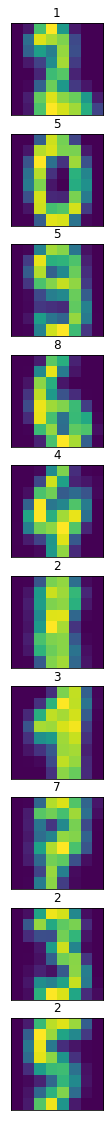

In [20]:


fig, ax = plt.subplots(10, figsize = (20, 20))
for i in range(len(centers)):
    ax[i].imshow(centers[i])
    ax[i].set_title(kmeans.labels_[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()


In [27]:
#2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label, so map the cluster label to the true (target) label. 
from statistics import mode

predict_y = kmeans.predict(X)

labels_pred = np.zeros_like(predict_y)

for i in range(0,10):
    labels_pred[predict_y == i] = mode(digits.target[predict_y == i]) 

X.shape

(1797, 64)

In [30]:
# 3 Now that your cluster labels are matched to the supervised learning labels, check the classification accuracy of your clustering model (accuracy score and confusion matrix). Give a two paragraph interpretation.

print(accuracy_score(y, labels_pred))
confusion_matrix(y, labels_pred)

0.7918753478018921


array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,  55,  24,   1,   0,   1,   2,   0,  99,   0],
       [  1,   2, 147,  13,   0,   0,   0,   4,   8,   2],
       [  0,   0,   0, 154,   0,   2,   0,   7,   7,  13],
       [  0,   7,   0,   0, 162,   0,   0,  10,   2,   0],
       [  0,   0,   0,   1,   2, 136,   1,   0,   0,  42],
       [  1,   1,   0,   0,   0,   0, 177,   0,   2,   0],
       [  0,   2,   0,   0,   0,   0,   0, 175,   2,   0],
       [  0,   6,   3,   2,   0,   4,   2,   5, 100,  52],
       [  0,  20,   0,   6,   0,   4,   0,   9,   1, 140]], dtype=int64)

In [33]:
# 4 Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.
fowlkes_mallows_score(load_digits().target, labels_pred)

0.6997609248183732

# 2: Image Compression second pass

Use any the clustering algorithms we see to produce what you think is the best image compression ratio that is **visually indistinguishable** from the original image (recall in the lecture the result was very compressed but also much uglier)

Justify your choice and process in 3 paragraphs.

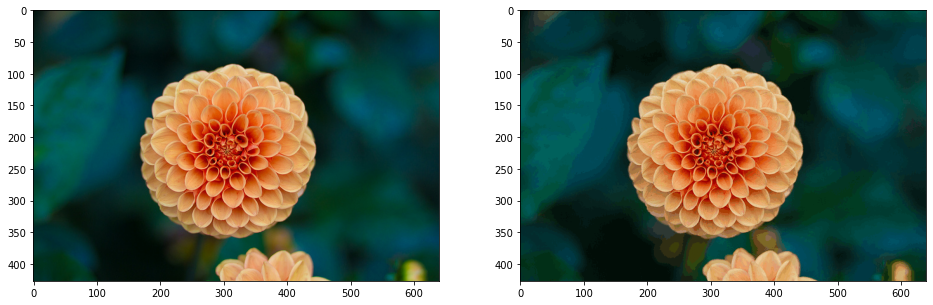

In [35]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import MiniBatchKMeans
flower = load_sample_image('flower.jpg')

savetheflower = flower

data = flower / 255.0
data = data.reshape(427 * 640, 3)

kmeans = MiniBatchKMeans(100)
kmeans.fit(data)
new_colours = kmeans.cluster_centers_[kmeans.predict(data)]
flower_recolored = new_colours.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(flower)
ax[1].imshow(flower_recolored)
plt.show()

# 3. Clustering on Colleges

This question will use the data from `college.csv`

1. Use clustering with `k=2` on all data except whether the college is private of not. Try to match it best to the private/public college split (hint: don't forget to normalize your features!). Evaluate it in terms of classification metrics and clustering metrics.

2. Knowing what you found in `3.1`, find the best overall clustering with the k of your choice. Make an argument and a visualization of the clusters (with two relevant statistics) to demonstrate why you think your clustering is good.